<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [3]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1

# TODO - your code!

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [4]:
maxlen = 80
batch_size = 32

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
71/71 [==============================] - 4s 54ms/step - loss: nan - accuracy: 0.0053
Test score: nan
Test accuracy: 0.005342831835150719


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*
pad_sequences is used to ensure that all sequences in a list have the same length, by default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.



## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*
Unfortunately, the range of contextual information that standard RNNs can access is in practice quite limited. The problem is that the influence of a given input on the hidden layer, and therefore on the network output, either decays or blows up exponentially as it cycles around the network’s recurrent connections. This shortcoming … referred to in the literature as the vanishing gradient problem … Long Short-Term Memory (LSTM) is an RNN architecture specifically designed to address the vanishing gradient problem.


## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

The classic LSTM architecture is characterized by a persistent linear cell state surrounded by non-linear layers feeding input and parsing output from it. Concretely the cell state works in concert with 4 gating layers, these are often called the forget, (2x) input, and output gates.

Multiplicative LSTMs (mLSTMs) were introduced by Krause et al 2016. Since then, this complicated variant has been the centerpiece of a number of high-profile, state of the art achievements in natural language processing. Perhaps the most well-known of these is OpenAI’s unsupervised sentiment neuron.

Attention in machine learning refers to a model’s ability to focus on specific elements in data, in our case the hidden state outputs of LSTMs.


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2, and you should also resize the images using scikit-image.

In [21]:
!pip install google_images_download

     |████████████████████████████████| 911kB 21.1MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14549 sha256=5bb6d03c837c8dff28cce1d6303ed365f5706e9510bec0186a7230339596df50
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [37]:
from skimage.io import imread_collection

col_dir = '../frog_images/*jpg'
images = imread_collection(col_dir)

In [38]:
print(type(images))
print(type(images[0]))

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>


Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [32]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
# TODO - your code!

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`
    function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    types_of_frogs = ['bullfrog', 'tree frog', 'tailed frog']
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    for entry in results:
        if entry[1] in types_of_frogs:
            return True
    return False

In [39]:
import os
col_dir = '/frog_images'
images = []
for filename in os.listdir(col_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
       images.append(filename)

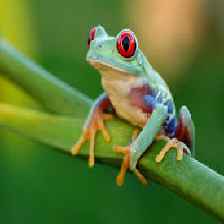

In [40]:
process_img_path('/frog_images/frog_1.jpeg')

In [41]:
for each_image in images:
   print(f'{each_image} contains a frog:',img_contains_frog(process_img_path(f'/frog_images/{each_image}')))

40960/35363 [==================================] - 0s 0us/step
frog_4.jpg contains a frog: False
frog_3.jpg contains a frog: False
frog_2.jpg contains a frog: False


<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 
- Load libraries
- Prepare dataset
- Architect the autoencoder
- Train the model
- Generate predictions and validation


<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
* Based on what I got interested to the most is outcome prediction using Unit 2 and Unit 4 learning.

- What area of Data Science would you most like to learn more about, and why?
* I would like to enhance all most especially from Units 2-4. I believe these will be very useful in general.

- Where do you think Data Science will be in 5 years?
* Data Science is going to be really big, as everything depends on data and as the saying goes "numbers don't lie"

- What are the threats posed by AI to our society?
* privacy issues

- How do you think we can counteract those threats? 
* stay educated

- Do you think achieving General Artifical Intelligence is ever possible?
* yes

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [42]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")